<a href="https://colab.research.google.com/github/ArivalaganRaghavan/Product-Sales-Forecasting/blob/main/Product_Sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TEST_FINAL.csv to TEST_FINAL.csv
Saving TRAIN.csv to TRAIN.csv
User uploaded file "TEST_FINAL.csv" with length 849045 bytes
User uploaded file "TRAIN.csv" with length 9329613 bytes


In [3]:
df1 = pd.read_csv("TEST_FINAL.csv")

In [4]:
print("shape of df1(Test):", df1.shape )

shape of df1(Test): (22265, 8)


In [5]:
df1

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [6]:
df2 = pd.read_csv("TRAIN.csv")

In [7]:
print("shape of df1(TRAIN):", df2.shape)

shape of df1(TRAIN): (188340, 10)


In [8]:
df = pd.concat([df1,df2])

In [9]:
df2

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [10]:
 #checking the columns dtypes and the basic info of the data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [11]:
# checking for the NULL values
df2.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [12]:
colum_list = list(df2.columns)
colum_list

['ID',
 'Store_id',
 'Store_Type',
 'Location_Type',
 'Region_Code',
 'Date',
 'Holiday',
 'Discount',
 '#Order',
 'Sales']

In [13]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,188340,188340,T1188340,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,188340.0,NaN,NaN,NaN,183.0,105.366308,1.0,92.0,183.0,274.0,365.0
Store_Type,188340,4,S1,88752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,188340,5,L1,85140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,188340,4,R1,63984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,188340,516,2019-05-31,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,188340.0,NaN,NaN,NaN,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
Discount,188340,2,No,104051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#Order,188340.0,NaN,NaN,NaN,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
Sales,188340.0,NaN,NaN,NaN,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


In [14]:
# printing the value counts of each column
for col in colum_list:
    print('-------------------------')
    print(f"{col} the value counts: {df2[col].nunique()}")
    print('-------------------------')

-------------------------
ID the value counts: 188340
-------------------------
-------------------------
Store_id the value counts: 365
-------------------------
-------------------------
Store_Type the value counts: 4
-------------------------
-------------------------
Location_Type the value counts: 5
-------------------------
-------------------------
Region_Code the value counts: 4
-------------------------
-------------------------
Date the value counts: 516
-------------------------
-------------------------
Holiday the value counts: 2
-------------------------
-------------------------
Discount the value counts: 2
-------------------------
-------------------------
#Order the value counts: 299
-------------------------
-------------------------
Sales the value counts: 47422
-------------------------


We could see that there are 365 store id

4 types of stoe
5 location type and 4 Region count

In [15]:
col_list1 = [
 'Store_Type',
 'Location_Type',
 'Region_Code']

for cat in col_list1:
    print('-------------------------')
    print(f"{col} the sum of sales for {cat}: {df2.groupby(cat)['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)}")
    print('-------------------------')
    print('-------------------------')
    print(f"{col} the average of sales for {cat}: {df2.groupby(cat)['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)}")
    print('-------------------------')

-------------------------
Sales the sum of sales for Store_Type:   Store_Type         Sales
0         S1  3.343866e+09
3         S4  2.752946e+09
2         S3  1.165658e+09
1         S2  7.955308e+08
-------------------------
-------------------------
Sales the average of sales for Store_Type:   Store_Type         Sales
3         S4  59945.685926
2         S3  47063.068209
0         S1  37676.511694
1         S2  27530.828222
-------------------------
-------------------------
Sales the sum of sales for Location_Type:   Location_Type         Sales
0            L1  3.529359e+09
1            L2  2.872964e+09
2            L3  9.897865e+08
4            L5  3.509163e+08
3            L4  3.149745e+08
-------------------------
-------------------------
Sales the average of sales for Location_Type:   Location_Type         Sales
1            L2  59231.480373
0            L1  41453.597889
2            L3  33072.257756
3            L4  29067.414313
4            L5  25187.787261
------------------

In [16]:
df2['Date'] = pd.to_datetime(df2['Date'])

# Create separate columns for year, month, day, and week
df2['year'] = df2['Date'].dt.year
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2['week'] = df2['Date'].dt.isocalendar().week  # ISO week number

print(df2.head())  # Display first few rows


         ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  year  month  day  week  
0        1      Yes       9   7011.84  2018      1    1     1  
1        1      Yes      60  51789.12  2018      1    1     1  
2        1      Yes      42  36868.20  2018      1    1     1  
3        1      Yes      23  19715.16  2018      1    1     1  
4        1      Yes      62  45614.52  2018      1    1     1  


In [17]:
df2

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,day,week
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,2019,5,31,22
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,2019,5,31,22
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,2019,5,31,22
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,2019,5,31,22


In [18]:
temp = df2.groupby("Date")["Sales"].sum().reset_index()
temp.head()

,Date,Sales
0,2018-01-01,15345484.5
1,2018-01-02,19592415.0
2,2018-01-03,18652527.0
3,2018-01-04,19956267.0
4,2018-01-05,22902651.0


In [19]:
temp.set_index('Date', inplace=True)
temp.head()

,Sales
Date,
2018-01-01,15345484.5
2018-01-02,19592415.0
2018-01-03,18652527.0
2018-01-04,19956267.0
2018-01-05,22902651.0


<Axes: xlabel='Date'>

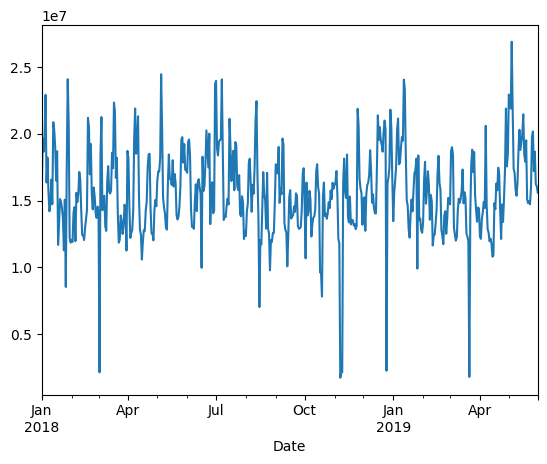

In [20]:
temp.Sales.plot()

In [21]:
temp_avg = df2[["Date","Sales"]]
temp_avg = temp_avg.groupby("Date")["Sales"].mean().reset_index()
temp_avg.head()

,Date,Sales
0,2018-01-01,42042.423288
1,2018-01-02,53677.849315
2,2018-01-03,51102.813699
3,2018-01-04,54674.704110
4,2018-01-05,62746.989041


In [22]:
temp_avg.set_index('Date', inplace=True)
temp_avg.head()

,Sales
Date,
2018-01-01,42042.423288
2018-01-02,53677.849315
2018-01-03,51102.813699
2018-01-04,54674.704110
2018-01-05,62746.989041


<Axes: xlabel='Date'>

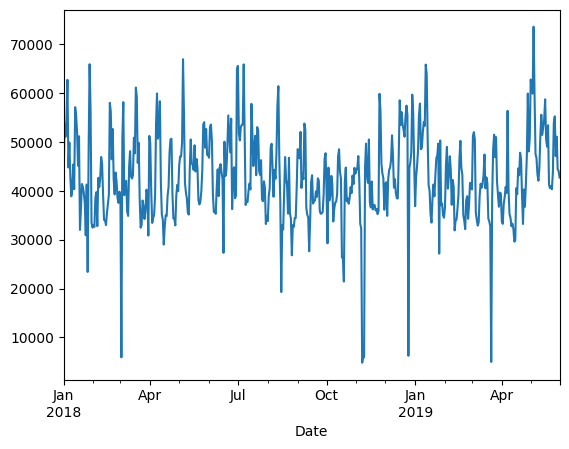

In [23]:
temp_avg.Sales.plot()

In [24]:
df2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,day,week
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,1


In [25]:
reg = df2.loc[df2["Store_Type"] == "S1"][["Date", "Sales"]]
reg.head()

,Date,Sales
0,2018-01-01,7011.84
5,2018-01-01,34211.22
6,2018-01-01,35352.66
7,2018-01-01,52650.00
14,2018-01-01,42889.89


In [26]:
reg= reg.groupby("Date")["Sales"].sum()
reg

,Sales
Date,
2018-01-01,7292027.67
2018-01-02,8269809.00
2018-01-03,7795536.00
2018-01-04,8430363.00
2018-01-05,9769758.00
...,...
2019-05-27,7086294.00
2019-05-28,7758210.00
2019-05-29,6734739.00


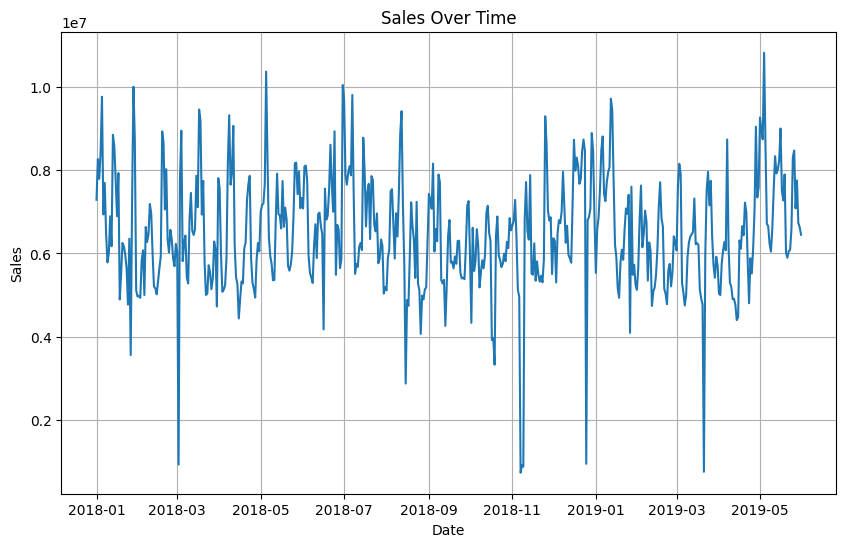

In [27]:


# Plotting the 'Sales' column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(reg.index, reg.values)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Over Time")
plt.grid(True)
plt.show()

In [28]:
storetypelist = df2["Store_Type"].unique()
storetypelist

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [29]:
storetypelist = list(storetypelist)

In [30]:
storetypelist

['S1', 'S4', 'S3', 'S2']

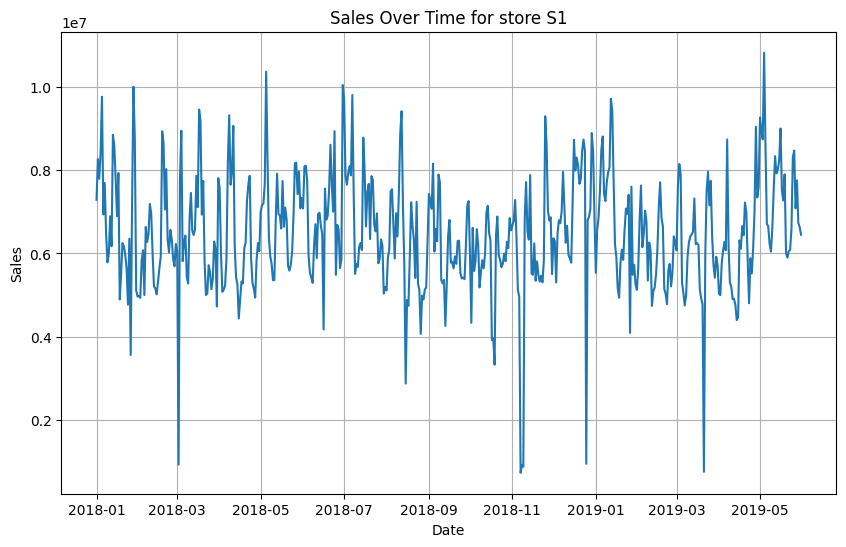

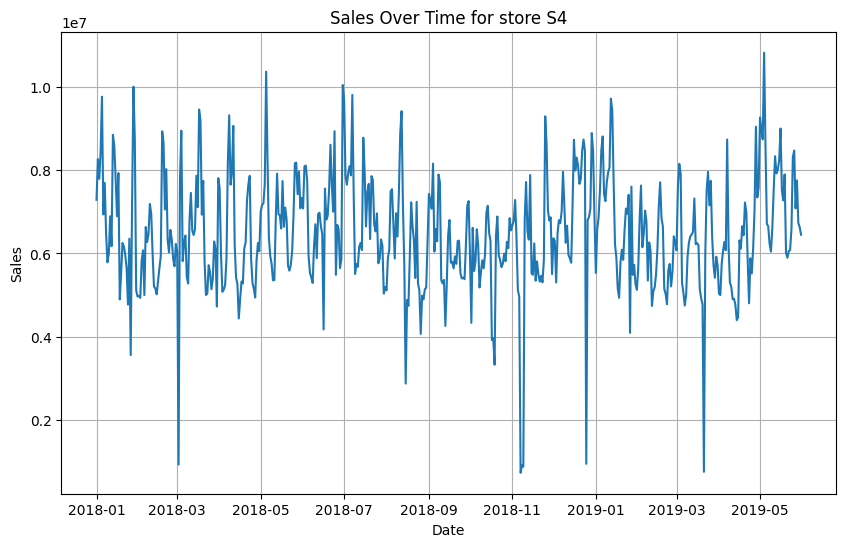

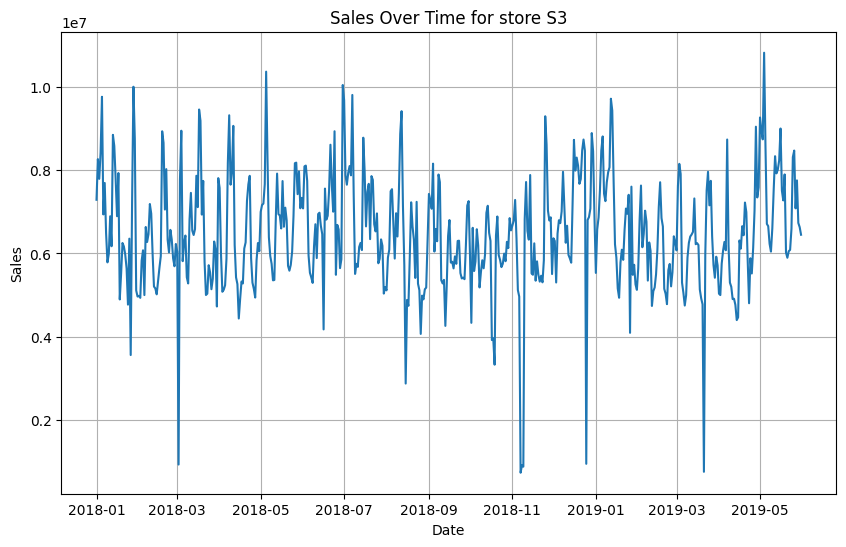

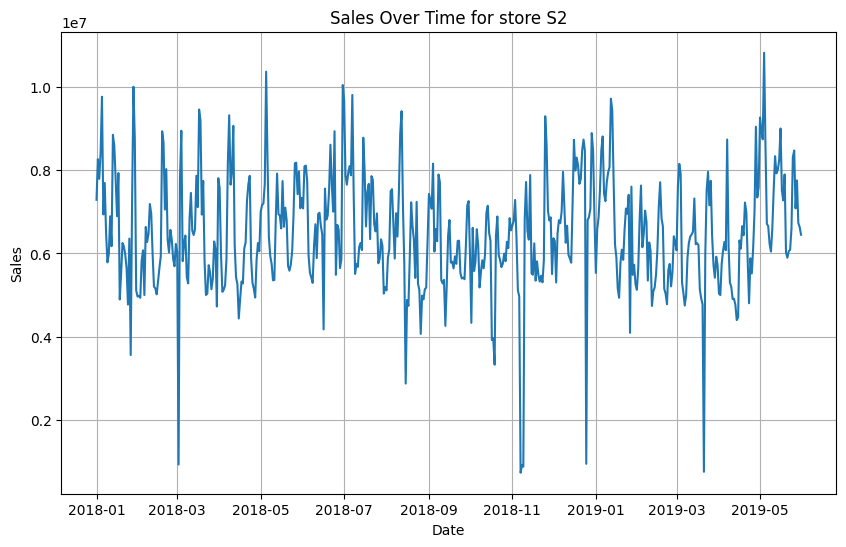

In [31]:
for cat in storetypelist:
  reg1 = df2.loc[df2["Store_Type"] == cat][["Date", "Sales"]]
  reg1= reg1.groupby("Date")["Sales"].sum()
  # Plotting the 'Sales' column
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10, 6))  # Adjust figure size if needed
  plt.plot(reg.index, reg.values)
  plt.xlabel("Date")
  plt.ylabel("Sales")
  plt.title(f"Sales Over Time for store {cat}")
  plt.grid(True)
  plt.show()


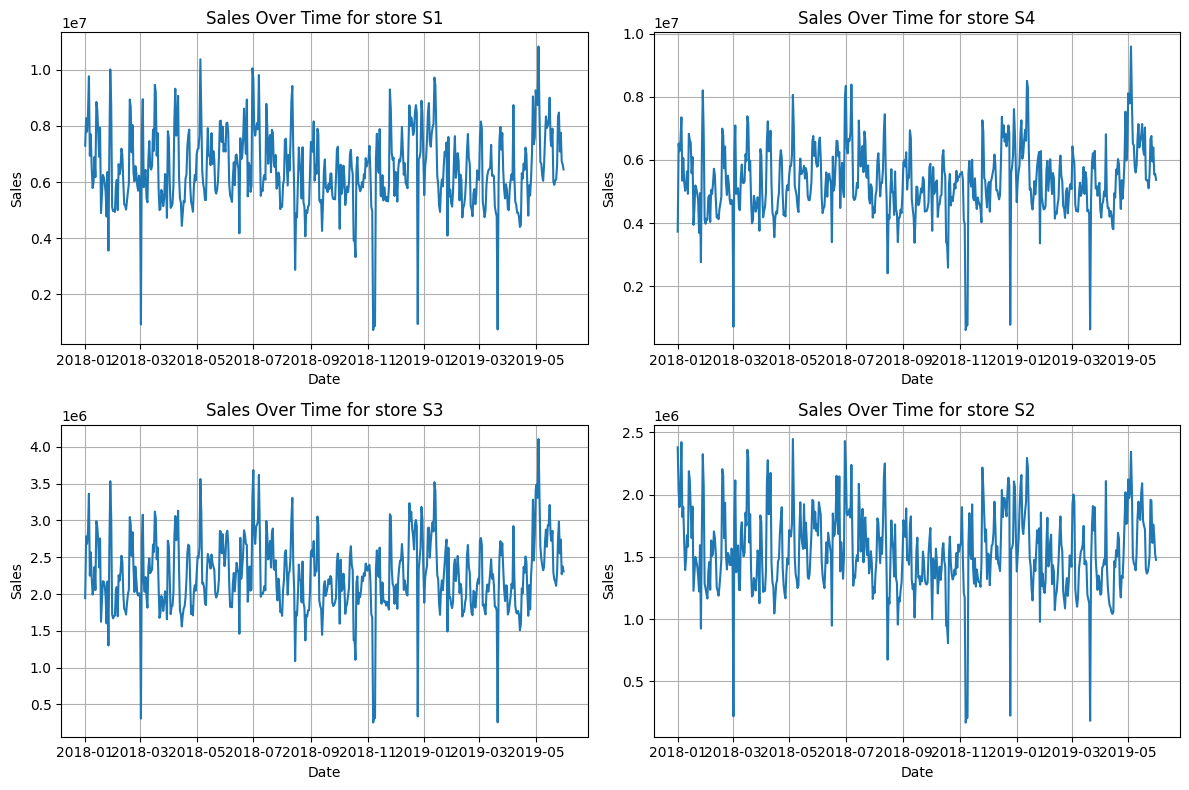

In [32]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplots
num_stores = len(storetypelist)
rows = 2
cols = 2

# Create a figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through store types and plot
for i, cat in enumerate(storetypelist):
    reg1 = df2.loc[df2["Store_Type"] == cat][["Date", "Sales"]]
    reg1 = reg1.groupby("Date")["Sales"].sum()

    axes[i].plot(reg1.index, reg1.values)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Sales")
    axes[i].set_title(f"Sales Over Time for store {cat}")
    axes[i].grid(True)

# Hide any unused subplots if storetypelist has fewer than 4 entries
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
storetypelist = df2["Store_Type"].unique()
storetypelist

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
 10  year           188340 non-null  int32         
 11  month          188340 non-null  int32         
 12  day            188340 non-null  int32         
 13  week           188340 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(3

In [35]:
location_list = list(df2["Location_Type"].unique())
print(location_list)

reginol_list = list(df2["Region_Code"].unique())
print(reginol_list)

['L3', 'L2', 'L1', 'L5', 'L4']
['R1', 'R4', 'R2', 'R3']


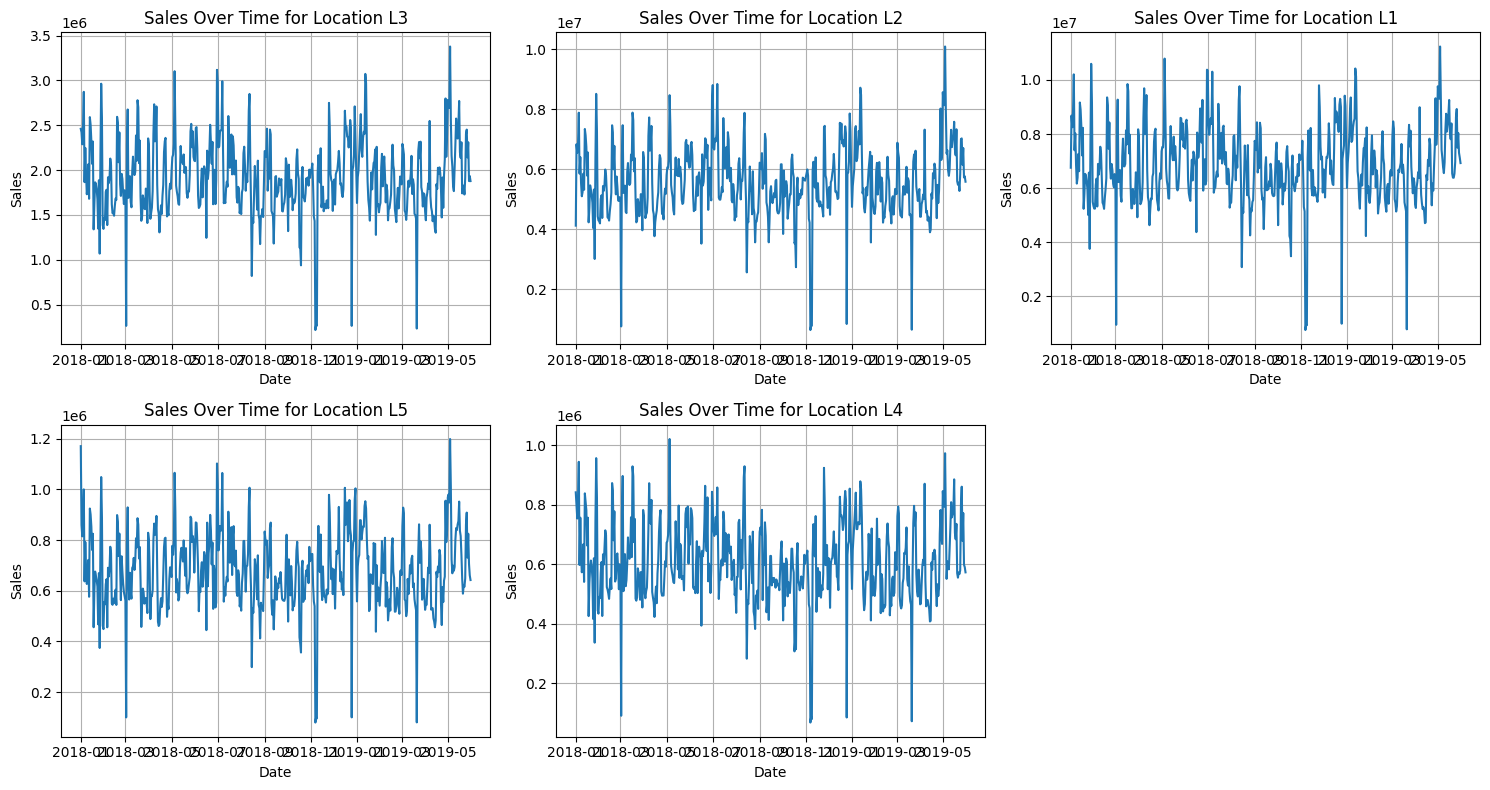

In [36]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplots
num_locations = len(location_list)
rows, cols = 2, 3  # Adjusting to fit 5 plots comfortably

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

# Loop through location types and plot
for i, loc in enumerate(location_list):
    reg1 = df2.loc[df2["Location_Type"] == loc][["Date", "Sales"]]
    reg1 = reg1.groupby("Date")["Sales"].sum()

    axes[i].plot(reg1.index, reg1.values)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Sales")
    axes[i].set_title(f"Sales Over Time for Location {loc}")
    axes[i].grid(True)

# Hide unused subplots if location_list has fewer than 6 entries
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

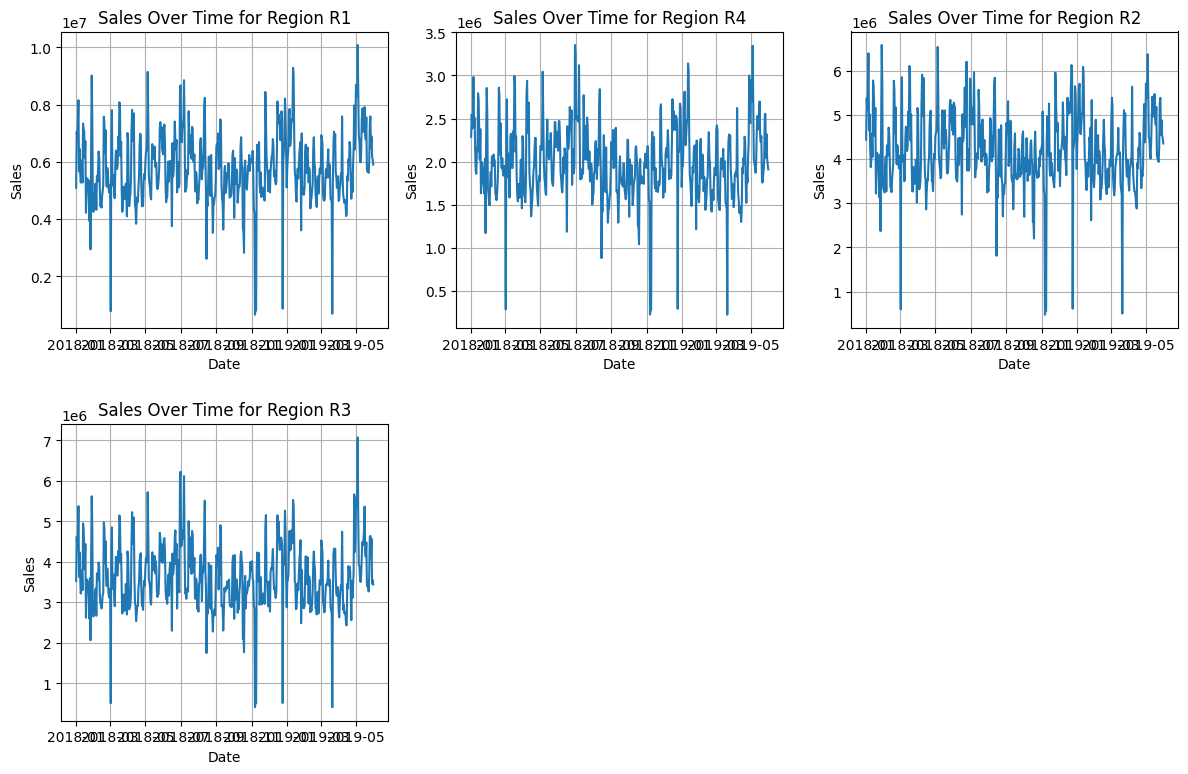

In [37]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

# Loop through region codes and plot
for i, reg in enumerate(reginol_list):
    reg1 = df2.loc[df2["Region_Code"] == reg][["Date", "Sales"]]
    reg1 = reg1.groupby("Date")["Sales"].sum()

    axes[i].plot(reg1.index, reg1.values)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Sales")
    axes[i].set_title(f"Sales Over Time for Region {reg}")
    axes[i].grid(True)

# Hide unused subplots if regional_list has fewer than 4 entries
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Calculate Sum & Average for Sales Column


In [38]:
# Group by Store_Type, Location_Type, and Region_Code to calculate sum and average
sales_summary = df2.groupby("Store_Type")["Sales"].agg(["sum", "mean"])
sales_summary_location = df2.groupby("Location_Type")["Sales"].agg(["sum", "mean"])
sales_summary_region = df2.groupby("Region_Code")["Sales"].agg(["sum", "mean"])

# Print summary data
print("Sales Summary by Store Type:\n", sales_summary)
print("\nSales Summary by Location Type:\n", sales_summary_location)
print("\nSales Summary by Region Code:\n", sales_summary_region)

Sales Summary by Store Type:
                      sum          mean
Store_Type                            
S1          3.343866e+09  37676.511694
S2          7.955308e+08  27530.828222
S3          1.165658e+09  47063.068209
S4          2.752946e+09  59945.685926

Sales Summary by Location Type:
                         sum          mean
Location_Type                            
L1             3.529359e+09  41453.597889
L2             2.872964e+09  59231.480373
L3             9.897865e+08  33072.257756
L4             3.149745e+08  29067.414313
L5             3.509163e+08  25187.787261

Sales Summary by Region Code:
                       sum          mean
Region_Code                            
R1           2.992243e+09  46765.488405
R2           2.170172e+09  40054.847344
R3           1.870205e+09  42144.517063
R4           1.025381e+09  39743.434249


# Plot Bar Graph & Pie Chart for Sales Column


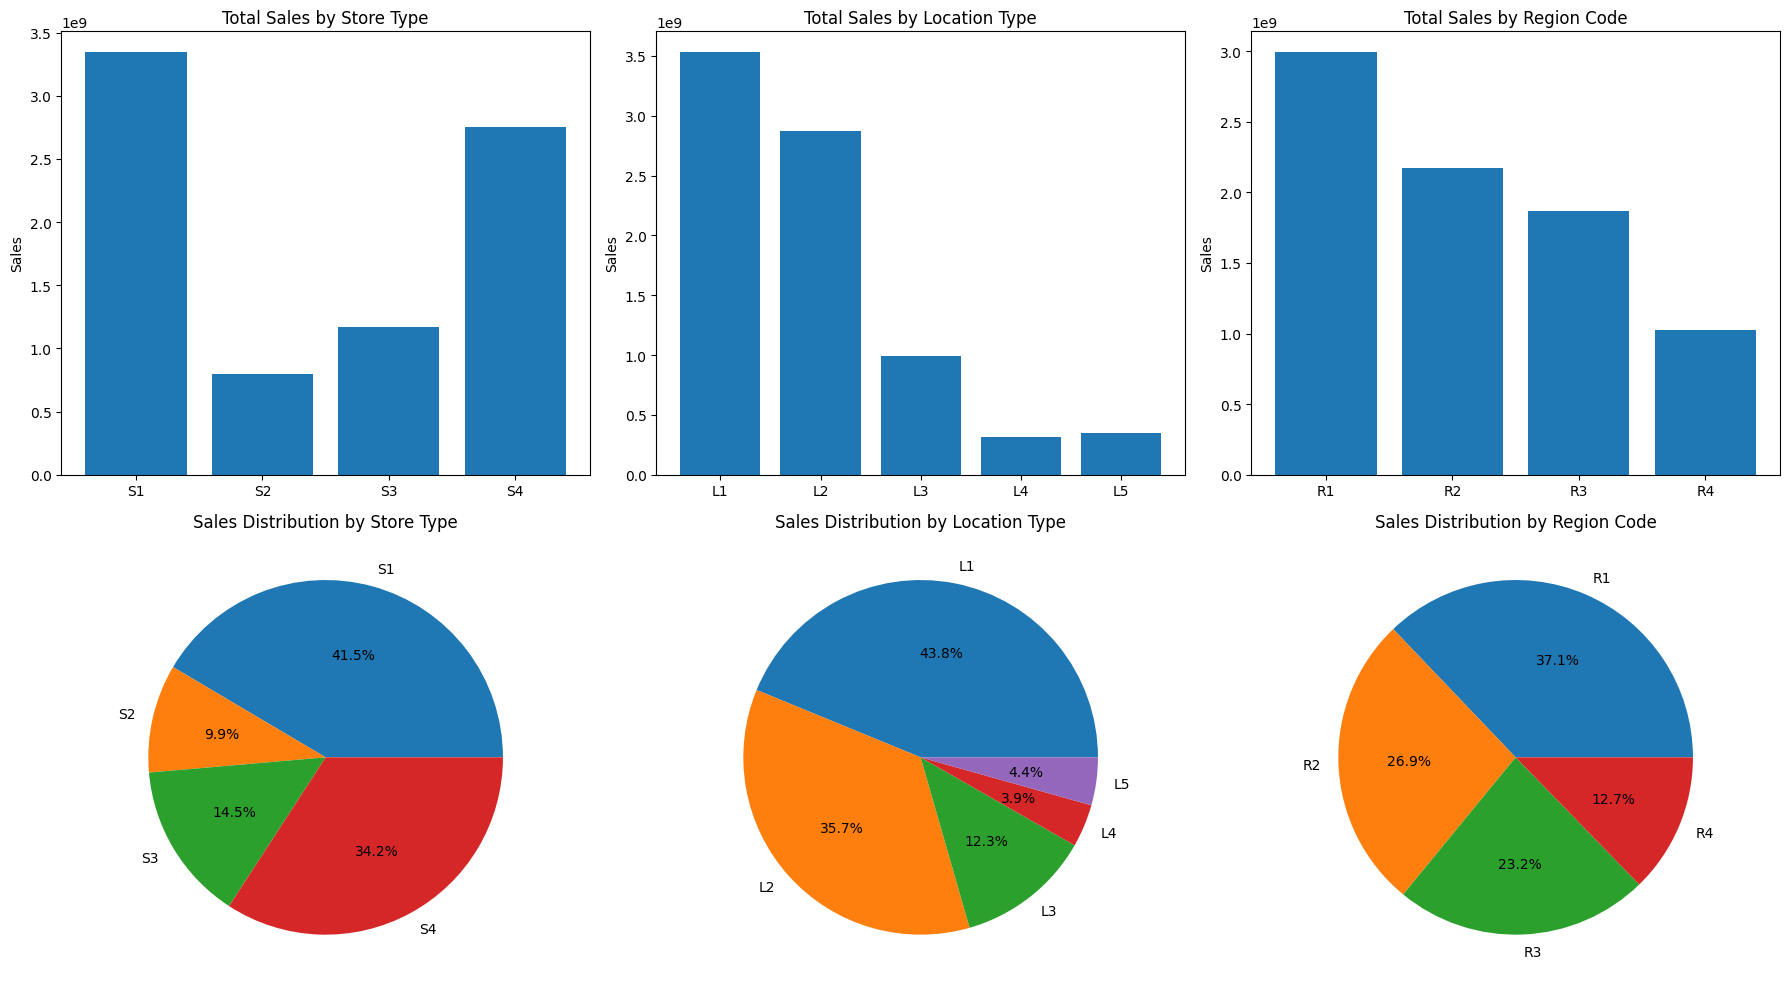

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Store Type Sales Bar Graph
axes[0, 0].bar(sales_summary.index, sales_summary["sum"])
axes[0, 0].set_title("Total Sales by Store Type")
axes[0, 0].set_ylabel("Sales")

# Location Type Sales Bar Graph
axes[0, 1].bar(sales_summary_location.index, sales_summary_location["sum"])
axes[0, 1].set_title("Total Sales by Location Type")
axes[0, 1].set_ylabel("Sales")

# Region Code Sales Bar Graph
axes[0, 2].bar(sales_summary_region.index, sales_summary_region["sum"])
axes[0, 2].set_title("Total Sales by Region Code")
axes[0, 2].set_ylabel("Sales")

# Pie Chart for Store Type Sales
axes[1, 0].pie(sales_summary["sum"], labels=sales_summary.index, autopct="%1.1f%%")
axes[1, 0].set_title("Sales Distribution by Store Type")

# Pie Chart for Location Type Sales
axes[1, 1].pie(sales_summary_location["sum"], labels=sales_summary_location.index, autopct="%1.1f%%")
axes[1, 1].set_title("Sales Distribution by Location Type")

# Pie Chart for Region Code Sales
axes[1, 2].pie(sales_summary_region["sum"], labels=sales_summary_region.index, autopct="%1.1f%%")
axes[1, 2].set_title("Sales Distribution by Region Code")

plt.tight_layout()
plt.show()

In [40]:
order_summary = df2.groupby("Store_Type")["#Order"].agg(["sum", "mean"])
order_summary_location = df2.groupby("Location_Type")["#Order"].agg(["sum", "mean"])
order_summary_region = df2.groupby("Region_Code")["#Order"].agg(["sum", "mean"])

# Print summary data
print("Order Summary by Store Type:\n", order_summary)
print("\nOrder Summary by Location Type:\n", order_summary_location)
print("\nOrder Summary by Region Code:\n", order_summary_region)

Order Summary by Store Type:
                 sum        mean
Store_Type                     
S1          5149577   58.022095
S2          1169502   40.472799
S3          1824495   73.663396
S4          4702286  102.392779

Order Summary by Location Type:
                    sum       mean
Location_Type                    
L1             5556742  65.265938
L2             4600675  94.851456
L3             1590881  53.156943
L4              513475  47.386028
L5              584087  41.924131

Order Summary by Region Code:
                  sum       mean
Region_Code                    
R1           5094794  79.626063
R2           3402429  62.798616
R3           2834847  63.882436
R4           1513790  58.674031


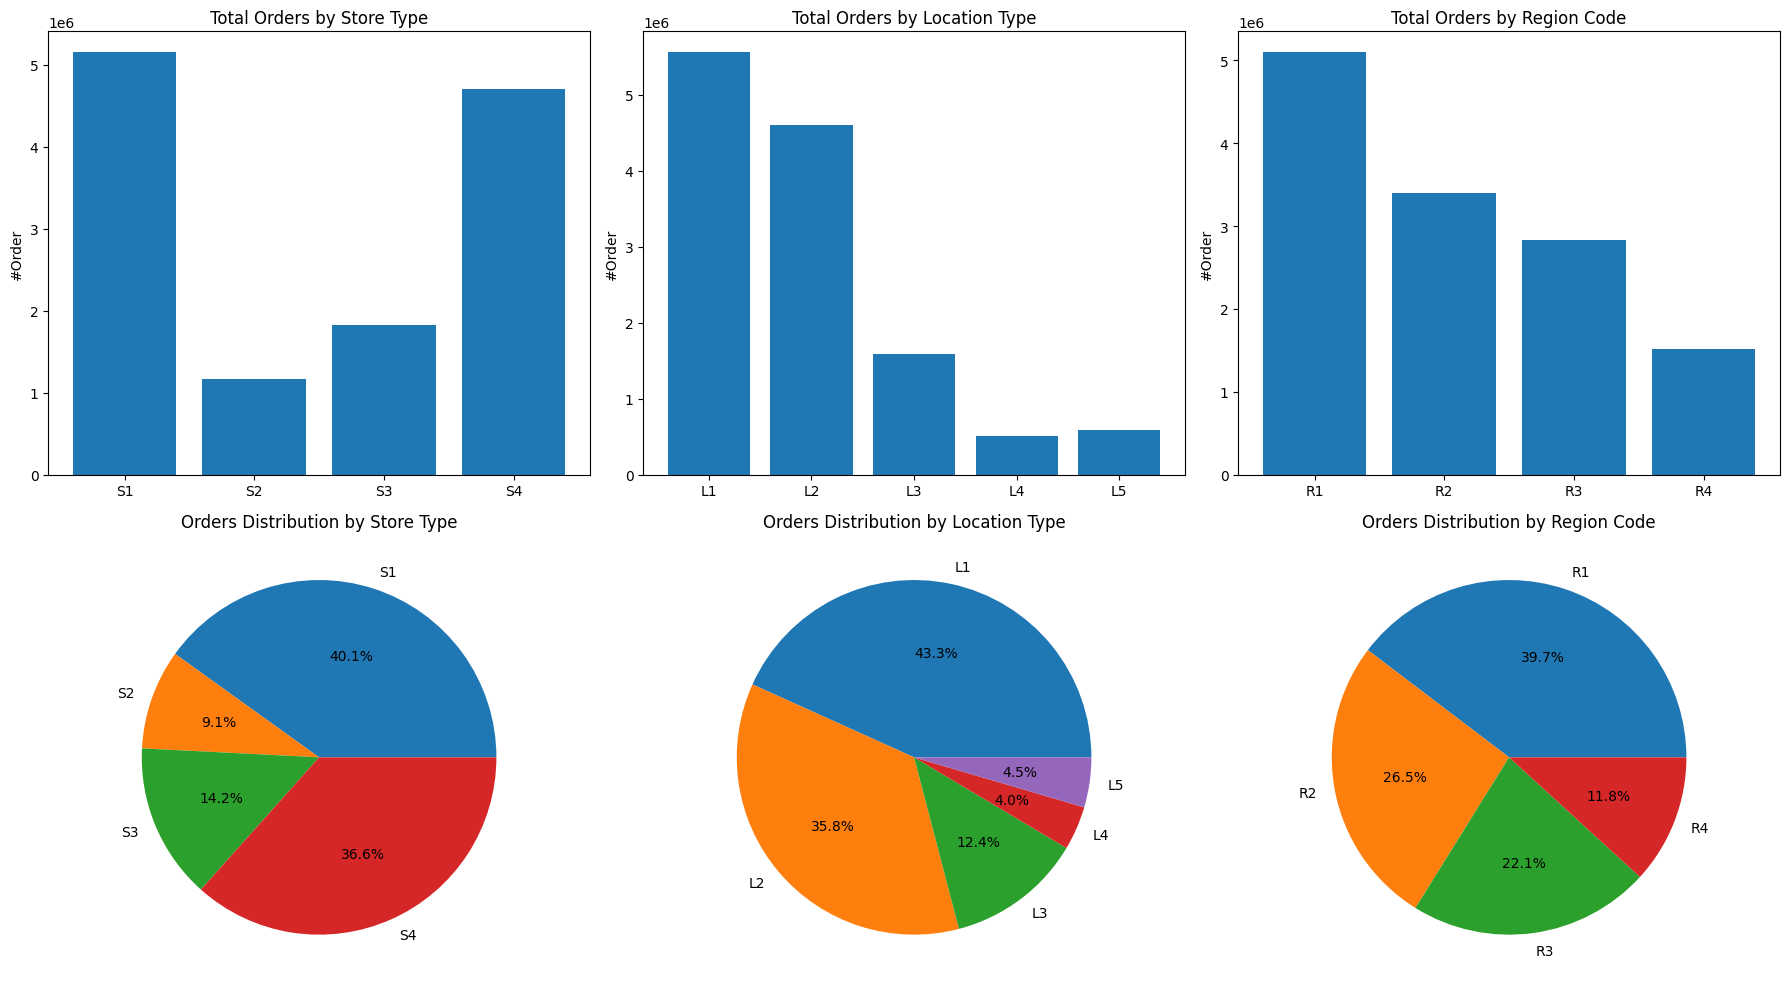

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Store Type Orders Bar Graph
axes[0, 0].bar(order_summary.index, order_summary["sum"])
axes[0, 0].set_title("Total Orders by Store Type")
axes[0, 0].set_ylabel("#Order")

# Location Type Orders Bar Graph
axes[0, 1].bar(order_summary_location.index, order_summary_location["sum"])
axes[0, 1].set_title("Total Orders by Location Type")
axes[0, 1].set_ylabel("#Order")

# Region Code Orders Bar Graph
axes[0, 2].bar(order_summary_region.index, order_summary_region["sum"])
axes[0, 2].set_title("Total Orders by Region Code")
axes[0, 2].set_ylabel("#Order")

# Pie Chart for Store Type Orders
axes[1, 0].pie(order_summary["sum"], labels=order_summary.index, autopct="%1.1f%%")
axes[1, 0].set_title("Orders Distribution by Store Type")

# Pie Chart for Location Type Orders
axes[1, 1].pie(order_summary_location["sum"], labels=order_summary_location.index, autopct="%1.1f%%")
axes[1, 1].set_title("Orders Distribution by Location Type")

# Pie Chart for Region Code Orders
axes[1, 2].pie(order_summary_region["sum"], labels=order_summary_region.index, autopct="%1.1f%%")
axes[1, 2].set_title("Orders Distribution by Region Code")

plt.tight_layout()
plt.show()

[]

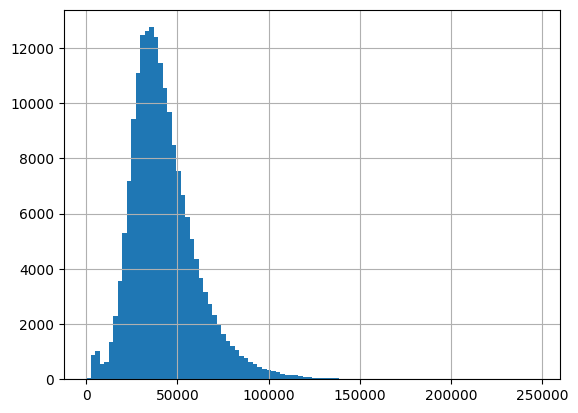

In [42]:
df2.Sales.hist(bins=100).plot()

In [43]:
df2.Sales.describe()

,Sales
count,188340.000000
mean,42784.327982
std,18456.708302
min,0.000000
25%,30426.000000
50%,39678.000000
75%,51909.000000
max,247215.000000


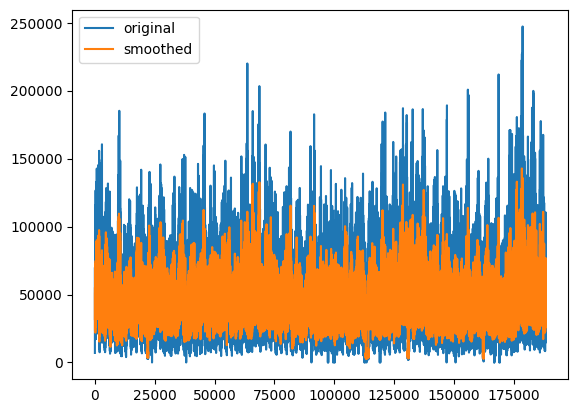

In [45]:
# Plot original data
df2.Sales.plot(label='original')

# Plot data after implementing Moving Averages
df2.Sales.rolling(3, center=False).mean().plot(label='smoothed')

plt.legend()

In [47]:
temp

,Sales
Date,
2018-01-01,15345484.50
2018-01-02,19592415.00
2018-01-03,18652527.00
2018-01-04,19956267.00
2018-01-05,22902651.00
...,...
2019-05-27,17197023.00
2019-05-28,18652065.00
2019-05-29,16213497.00


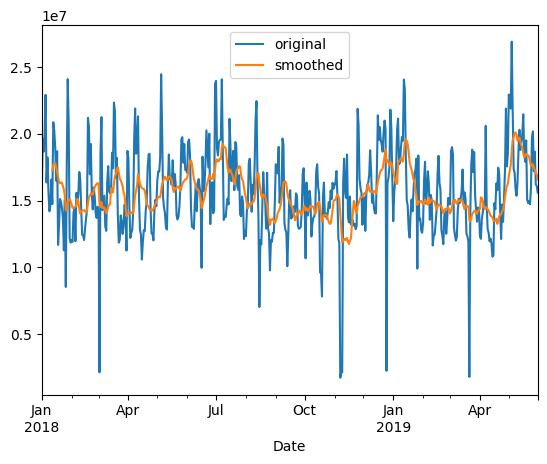

In [48]:
# Plot original data
temp.Sales.plot(label='original')

# Plot data after implementing Moving Averages
temp.Sales.rolling(12, center=False).mean().plot(label='smoothed')

plt.legend()

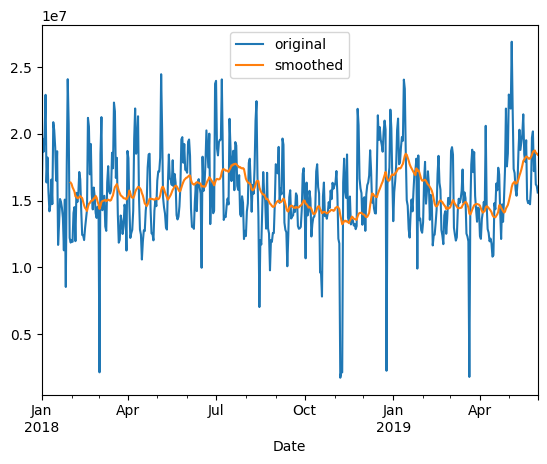

In [49]:
# Plot original data
temp.Sales.plot(label='original')

# Plot data after implementing Moving Averages
temp.Sales.rolling(31, center=False).mean().plot(label='smoothed')

plt.legend()